In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# intialisation des caractéristiques (features)
np.random.seed(0)

n_samples = 100 # echantillions


chambres = np.random.randint(1,6,n_samples)

superficie = np.random.uniform(1000,3500, n_samples)

#age de la maison
age = np.random.uniform(0,50, n_samples)

In [26]:
x = np.column_stack((superficie, chambres, age))
x

array([[1.30049140e+03, 5.00000000e+00, 4.64040647e+01],
       [1.74035049e+03, 1.00000000e+00, 3.52207201e+01],
       [1.29681930e+03, 4.00000000e+00, 1.59194648e+00],
       [1.79495795e+03, 4.00000000e+00, 8.23470782e+00],
       [2.03565749e+03, 4.00000000e+00, 3.10739201e+01],
       [1.16036874e+03, 2.00000000e+00, 2.88614294e+01],
       [2.73118030e+03, 4.00000000e+00, 1.18946411e+01],
       [2.41650364e+03, 3.00000000e+00, 4.67106999e+01],
       [1.66347373e+03, 5.00000000e+00, 3.06982978e+01],
       [2.30812013e+03, 1.00000000e+00, 2.67816402e+01],
       [1.23485128e+03, 1.00000000e+00, 2.94954988e+01],
       [2.43986624e+03, 5.00000000e+00, 3.65061015e+01],
       [3.32324049e+03, 3.00000000e+00, 1.55972498e+01],
       [1.79642238e+03, 2.00000000e+00, 1.99110531e+01],
       [2.66852595e+03, 1.00000000e+00, 1.04921874e+01],
       [1.32949466e+03, 2.00000000e+00, 9.30965029e+00],
       [2.79081801e+03, 2.00000000e+00, 4.72186195e+01],
       [1.72351523e+03, 1.00000

In [27]:
#bruit pour simuler les donner reeal
bruit = np.random.normal(0,1000,n_samples)

#target
y = 100 * superficie + 5000 * chambres -2000 * age + bruit

y =  y.reshape(-1,1) # reshape pour avoir une collone

y


array([[ 62762.99868634],
       [109790.86905304],
       [146115.55057202],
       [183718.04111707],
       [161771.79349017],
       [ 69361.6005642 ],
       [268904.85147145],
       [159714.19564006],
       [128607.62040797],
       [183674.23919079],
       [ 69722.71206518],
       [195716.75717798],
       [316179.92056228],
       [148439.92101617],
       [250606.54802642],
       [124150.78532018],
       [193951.79145467],
       [104534.2705975 ],
       [106582.80238888],
       [248122.85723296],
       [ 99093.16526723],
       [306069.20015809],
       [ 77996.16680128],
       [242644.90409056],
       [112395.38601232],
       [264509.96056415],
       [328694.39320147],
       [169896.65179317],
       [256374.01691592],
       [201000.7997965 ],
       [216630.49707133],
       [106226.08078132],
       [260441.47053057],
       [122287.66939104],
       [298823.4352427 ],
       [214546.11581247],
       [161867.7937153 ],
       [325947.8178864 ],
       [1442

In [28]:
# fonction d'activation Relu
def relu(x):
  return np.maximum(0,x)

# Derivée de la fonction ReLu
def derivee_relu(x):
  return np.where(x>0, 1, 0)

In [29]:
hidden_neurones = 2
out_neurron = 1
lr = 0.01

In [30]:
wh = np.random.uniform(size=(x.shape[1],hidden_neurones))
bh = np.random.uniform(size=(1,hidden_neurones))
wo = np.random.uniform(size=(hidden_neurones,out_neurron))
bo = np.random.uniform(size=(1,out_neurron))

In [31]:
# forward propagation
def forward(x,wh,bh,wo,bo):

  #calcule des activations de la coucche caché
  zh = np.dot(x,wh) + bh # entree de la couche cachée
  ah = relu(zh) # sortie de la couche cachée

  #calcule des activations de la coucche de sortie
  zo =np.dot(ah,wo) + bo # entree de la couche cachée
  output = zo # sortie de la couche de sortie (pas de fonction de sortie car on fait une regression)

  return ah,output

In [32]:
# Fonction de rétropropagation de l'erreur
def backward(X, y, ah, output, wh, bh, wo, bo, lr):
    # Calcul de l'erreur de sortie
    err_output = y - output  # Erreur entre la sortie prévue et la sortie réelle
    delta_output = err_output  # Pas besoin de dérivée pour la couche de sortie dans la régression linéaire

    # Calcul de l'erreur de la couche cachée
    err_hidden = delta_output.dot(wo.T)  # Erreur projetée sur la couche cachée
    delta_hidden = err_hidden * derivee_relu(ah)  # Calcul du delta pour la couche cachée

    # Mise à jour des poids et biais
    wo += ah.T.dot(delta_output) * lr  # Mise à jour des poids de la couche de sortie
    bo += np.sum(delta_output, axis=0, keepdims=True) * lr  # Mise à jour des biais de la couche de sortie
    wh += X.T.dot(delta_hidden) * lr  # Mise à jour des poids de la couche cachée
    bh += np.sum(delta_hidden, axis=0, keepdims=True) * lr  # Mise à jour des biais de la couche cachée

    return wh, bh, wo, bo


In [33]:
# entrainement du réseau de neurones
epochs = 1000 # itteration
for epoch in range(epochs):

  # forward propagation

  ah,output = forward(x,wh,bh,wo,bo)

  # backward propagation

  wh, bh, wo, bo = backward(x, y, ah, output, wh, bh, wo, bo, lr)

  # Affichage de la perte tous les 1000 épochs

  if(epoch + 1) % 1000 == 0:
    loss = np.mean((y-output)**2)
    print(f"Epoch {epoch +1 }, Loss {loss}")

  # affichage des resultat
  print("Prix prédit : ", output[:5])
  print("Prix réeele : ", y[:5])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]]
Prix réeele :  [[ 62762.99868634]
 [109790.86905304]
 [146115.55057202]
 [183718.04111707]
 [161771.79349017]]
Prix prédit :  [[191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]]
Prix réeele :  [[ 62762.99868634]
 [109790.86905304]
 [146115.55057202]
 [183718.04111707]
 [161771.79349017]]
Prix prédit :  [[191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]]
Prix réeele :  [[ 62762.99868634]
 [109790.86905304]
 [146115.55057202]
 [183718.04111707]
 [161771.79349017]]
Prix prédit :  [[191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]
 [191681.26520104]]
Prix réeele :  [[ 62762.99868634]
 [109790.86905304]
 [146115.55057202]
 [183718.04111707]
 [161771.79349017]]
Prix prédit :  [[191681.26520104]
 [191681.26520104]
 [191681.265201

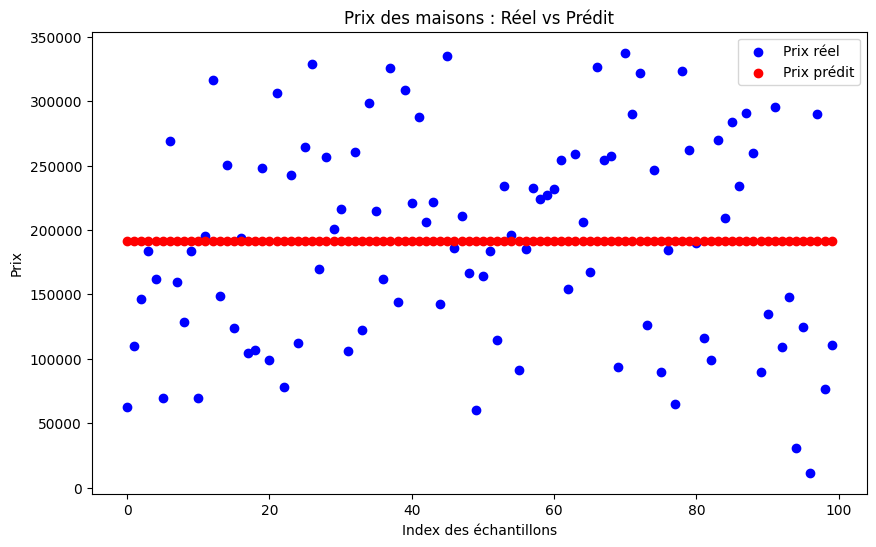

In [34]:
# Tracé des données réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(range(n_samples), y, color='blue', label='Prix réel')
plt.scatter(range(n_samples), output, color='red', label='Prix prédit')
plt.title('Prix des maisons : Réel vs Prédit')
plt.xlabel('Index des échantillons')
plt.ylabel('Prix')
plt.legend()
plt.show()
